In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import tidetools, geo_tools, viz_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [3]:
plt.style.use('/ocean/vdo/MEOPAR/biomodelevalpaper/bioModelEvalPaper.mplstyle')

In [4]:
dfo_chl = pickle.load(open('dfo_chl.pkl', 'rb'))
model_chl_dfo = pickle.load(open('model_chl_dfo.pkl', 'rb'))
cs_chl_2015 = pickle.load(open('cs_chl_2015.pkl', 'rb'))
cs_chl_2016 = pickle.load(open('cs_chl_2016.pkl', 'rb'))
cs_chl_2017 = pickle.load(open('cs_chl_2017.pkl', 'rb'))
model_chl_cs_2015 = pickle.load(open('model_chl_2015cs.pkl', 'rb'))
model_chl_cs_2016 = pickle.load(open('model_chl_2016cs.pkl', 'rb'))
model_chl_cs_2017 = pickle.load(open('model_chl_2017.pkl', 'rb'))

In [5]:
cs_chl = np.append(np.append(cs_chl_2015, cs_chl_2016), cs_chl_2017)
model_chl_cs = np.append(np.append(model_chl_cs_2015, model_chl_cs_2016), model_chl_cs_2017)

In [6]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 18

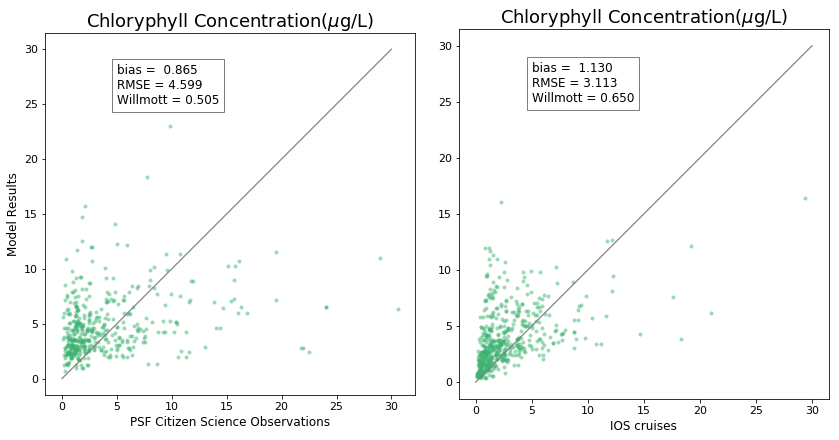

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12, 12))
ax[0].plot(cs_chl, model_chl_cs, '.', color = 'MediumSeaGreen', alpha = 0.5)
ax[0].set_title('Chloryphyll Concentration($\mu$g/L)')
ax[0].text(5, 25, 'bias =  0.865 \nRMSE = 4.599 \nWillmott = 0.505',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1].text(5, 25, 'bias =  1.130 \nRMSE = 3.113 \nWillmott = 0.650',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1].plot(dfo_chl, model_chl_dfo, '.', alpha = 0.5, color = 'MediumSeaGreen')
ax[1].set_title('Chloryphyll Concentration($\mu$g/L)')
ax[0].set_xlabel('PSF Citizen Science Observations')
ax[0].set_ylabel('Model Results')
ax[1].set_xlabel('IOS cruises')
#ax[1].set_ylabel('Model Results')
ax[0].set_aspect('equal')
#ax[0,0].set_xlim(5, 33)
#ax[0,0].set_ylim(5, 32)
ax[1].set_aspect('equal')
#ax[0,1].set_xlim(6, 22)
#ax[0,1].set_ylim(6, 22)
ax[0].plot(np.arange(31), np.arange(31), color = 'grey')
ax[1].plot(np.arange(0,31), np.arange(0,31), color = 'grey')
fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/psf_plots.png', dpi = 400)

In [8]:
print('bias =  ' + str(-np.mean(dfo_chl) + np.mean(model_chl_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_chl_dfo - dfo_chl)**2) /
                              len(dfo_chl))))
xbar = np.mean(dfo_chl)
print('Willmott = ' + str(1-(np.sum((model_chl_dfo - dfo_chl)**2)  / 
                             np.sum((np.abs(model_chl_dfo - xbar) 
                                     + np.abs(dfo_chl - xbar))**2))))

bias =  1.1295675984707625
RMSE = 3.1130318776174235
Willmott = 0.6498509292361905


In [9]:
print('bias =  ' + str(-np.mean(cs_chl) + np.mean(model_chl_cs)))
print('RMSE = ' + str(np.sqrt(np.sum((model_chl_cs - cs_chl)**2) /
                              len(cs_chl))))
xbar = np.mean(cs_chl)
print('Willmott = ' + str(1-(np.sum((model_chl_cs - cs_chl)**2)  / 
                             np.sum((np.abs(model_chl_cs - xbar) 
                                     + np.abs(cs_chl - xbar))**2))))

bias =  0.864778575809408
RMSE = 4.599369232848489
Willmott = 0.5048541500786355


In [48]:
c2016 = pickle.load(open('cs_2016_nuts.pkl', 'rb'))
c2017 = pickle.load(open('2017cs.pkl', 'rb'))
c2015 = pickle.load(open('../smelt_diag/2015cs.pkl', 'rb'))

In [49]:
depths_n = np.append(np.append(c2015['depths'], c2016['depths_n']), c2017['depth'])
depths_s = np.append(np.append(c2015['depths'], c2016['depths_s']), c2017['depth'])

In [50]:
dfo = pickle.load(open('dfo_nuts.pkl', 'rb'))
dfo.keys()

dict_keys(['dfo_ni', 'dfo_si', 'dfo_chl', 'model_si', 'model_ni', 'model_chl', 'lats_sn', 'lats_chl', 'datetimes_sn', 'datetimes_chl', 'lons_sn', 'lons_chl', 'depths_sn', 'depths_chl'])

In [51]:
cs_ni = np.append(np.append(c2015['cs_ni'], c2016['cs_ni']), c2017['cs_ni'])
cs_si = np.append(np.append(c2015['cs_si'], c2016['cs_si']), c2017['cs_si'])
model_ni_cs = np.append(np.append(c2015['model_ni'], c2016['model_ni']), c2017['model_ni'])
model_si_cs = np.append(np.append(c2015['model_si'], c2016['model_si']), c2017['model_si'])
dfo_ni = dfo['dfo_ni']
dfo_si = dfo['dfo_si']
model_ni_dfo = dfo['model_ni']
model_si_dfo = dfo['model_si']
depths_dfo = dfo['depths_sn']

In [52]:
np.unique(depths_dfo)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38.])

In [53]:
np.unique(depths_n)

array([ 0.,  2., 18., 20.])

In [55]:
np.unique(depths_s)

array([ 0.,  2.,  4.,  9., 18., 20., 21.])

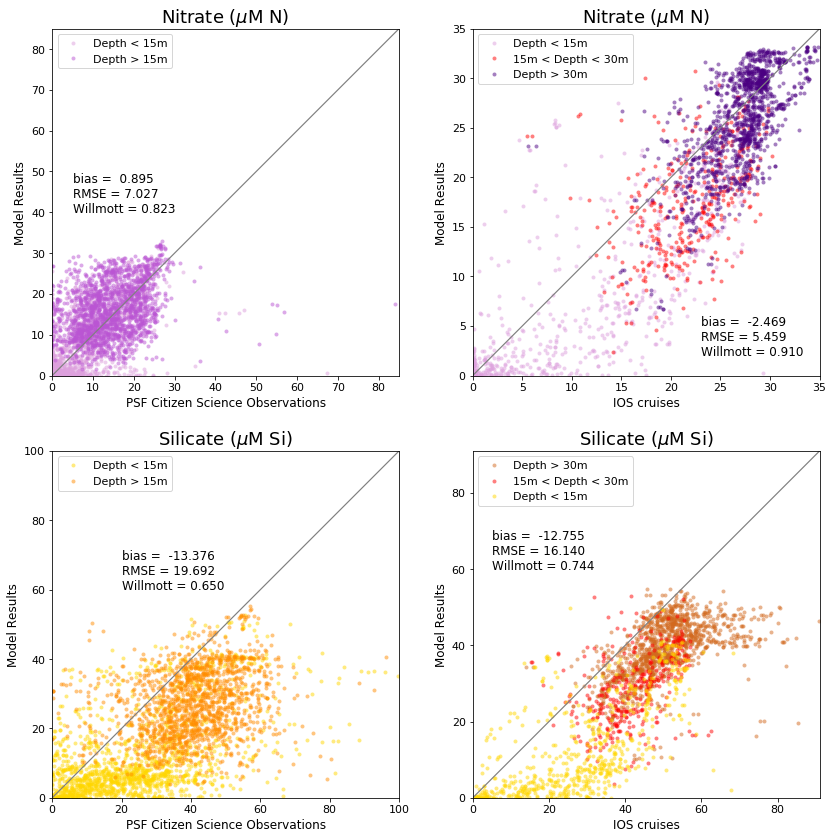

In [85]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax[0,0].plot(cs_ni[depths_n < 10], model_ni_cs[depths_n < 10],
             '.', alpha = 0.5, color = 'Plum', label = 'Depth < 15m')
ax[0,0].plot(cs_ni[depths_n >= 10], model_ni_cs[depths_n >= 10],
             '.', alpha = 0.5, color = 'MediumOrchid', label = 'Depth > 15m')
ax[0,0].legend()
ax[0,0].set_title('Nitrate ($\mu$M N)')
ax[0,0].text(5, 40, 'bias =  0.895 \nRMSE = 7.027 \nWillmott = 0.823',
        fontsize = 12)
ax[0,1].text(23, 2, 'bias =  -2.469 \nRMSE = 5.459 \nWillmott = 0.910',
         fontsize = 12)
ax[1,0].text(20, 60, 'bias =  -13.376 \nRMSE = 19.692 \nWillmott = 0.650',
        fontsize = 12)
ax[1,1].text(5, 60, 'bias =  -12.755 \nRMSE = 16.140 \nWillmott = 0.744',
        fontsize = 12)
ax[0,1].plot(dfo_ni[depths_dfo < 15], model_ni_dfo[depths_dfo < 15], 
             '.', alpha = 0.5, color = 'Plum', label = 'Depth < 15m')
ax[0,1].plot(dfo_ni[(depths_dfo >= 15) & (depths_dfo <= 21)], 
             model_ni_dfo[(depths_dfo >= 15) & (depths_dfo <= 21)], 
             '.', alpha = 0.5, color = 'r', label = '15m < Depth < 30m')
ax[0,1].plot(dfo_ni[depths_dfo > 21], 
             model_ni_dfo[depths_dfo > 21], 
             '.', alpha = 0.5, color = 'Indigo', label = 'Depth > 30m')
ax[0,1].legend()
ax[0,1].set_title('Nitrate ($\mu$M N)')
ax[0,0].set_xlabel('PSF Citizen Science Observations')
ax[0,0].set_ylabel('Model Results')
ax[0,1].set_xlabel('IOS cruises')
ax[0,1].set_ylabel('Model Results')
ax[1,0].plot(cs_si[depths_s < 10], model_si_cs[depths_s < 10],
             '.', alpha = 0.5, color = 'Gold', label = 'Depth < 15m')
ax[1,0].plot(cs_si[depths_s >= 10], model_si_cs[depths_s >= 10],
             '.', alpha = 0.5, color = 'DarkOrange', label = 'Depth > 15m')
ax[1, 0].legend()
ax[1,1].plot(dfo_si[depths_dfo > 21], 
             model_si_dfo[depths_dfo > 21], 
             '.', alpha = 0.5, color = 'chocolate', label = 'Depth > 30m')
ax[1,1].plot(dfo_si[(depths_dfo >= 15) & (depths_dfo <= 21)], 
             model_si_dfo[(depths_dfo >= 15) & (depths_dfo <= 21)], 
             '.', alpha = 0.5, color = 'r', label = '15m < Depth < 30m')
ax[1,1].plot(dfo_si[depths_dfo < 15], model_si_dfo[depths_dfo < 15], 
             '.', alpha = 0.5, color = 'Gold', label = 'Depth < 15m')
ax[1,1].legend()
ax[1,0].set_xlabel('PSF Citizen Science Observations')
ax[1,0].set_ylabel('Model Results')
ax[1,1].set_xlabel('IOS cruises')
ax[1,1].set_ylabel('Model Results')
ax[1,0].set_title('Silicate ($\mu$M Si)')
ax[1,1].set_title('Silicate ($\mu$M Si)')
ax[0,0].set_aspect('equal')
ax[0,0].set_xlim(0,85)
ax[0,0].set_ylim(0,85)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlim(0, 35)
ax[0,1].set_ylim(0, 35)
ax[1,1].set_aspect('equal')
ax[1,0].set_aspect('equal')
ax[1,0].set_xlim(0, 100)
ax[1,0].set_ylim(0, 100)
ax[1,1].set_xlim(0, 91)
ax[1,1].set_ylim(0, 91)
ax[0,0].plot(np.arange(200), np.arange(200), color = 'grey')
ax[1,0].plot(np.arange(200), np.arange(200), color = 'grey')
ax[1,1].plot(np.arange(200), np.arange(200), color='grey')
ax[0,1].plot(np.arange(200), np.arange(200), color='grey')
fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/psf_plots.png', dpi = 400)

In [81]:
print('bias =  ' + str(-np.mean(dfo_ni) + np.mean(model_ni_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_ni_dfo - dfo_ni)**2) /
                              len(dfo_ni))))
xbar = np.mean(dfo_ni)
print('Willmott = ' + str(1-(np.sum((model_ni_dfo - dfo_ni)**2)  / 
                             np.sum((np.abs(model_ni_dfo - xbar) 
                                     + np.abs(dfo_ni - xbar))**2))))

bias =  -2.468680941745948
RMSE = 5.458861373711734
Willmott = 0.9095851279525309


In [82]:
print('bias =  ' + str(-np.mean(dfo_si) + np.mean(model_si_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_si_dfo - dfo_si)**2) /
                              len(dfo_si))))
xbar = np.mean(dfo_si)
print('Willmott = ' + str(1-(np.sum((model_si_dfo - dfo_si)**2)  / 
                             np.sum((np.abs(model_si_dfo - xbar) 
                                     + np.abs(dfo_si - xbar))**2))))

bias =  -12.755058534790251
RMSE = 16.14025142648156
Willmott = 0.7442911847190237


In [83]:
print('bias =  ' + str(-np.mean(cs_ni) + np.mean(model_ni_cs)))
print('RMSE = ' + str(np.sqrt(np.sum((model_ni_cs - cs_ni)**2) /
                              len(cs_ni))))
xbar = np.mean(cs_ni)
print('Willmott = ' + str(1-(np.sum((model_ni_cs - cs_ni)**2)  / 
                             np.sum((np.abs(model_ni_cs - xbar) 
                                     + np.abs(cs_ni - xbar))**2))))

bias =  0.8947724863656923
RMSE = 7.026915453406394
Willmott = 0.8232355848913526


In [84]:
print('bias =  ' + str(-np.mean(cs_si[cs_si < 100]) + np.mean(model_si_cs[cs_si < 100])))
print('RMSE = ' + str(np.sqrt(np.sum((model_si_cs[cs_si < 100] - cs_si[cs_si < 100])**2) /
                              len(cs_si[cs_si < 100]))))
xbar = np.mean(cs_si[cs_si < 100])
print('Willmott = ' + str(1-(np.sum((model_si_cs[cs_si < 100] - cs_si[cs_si < 100])**2)  / 
                             np.sum((np.abs(model_si_cs[cs_si < 100] - xbar) 
                                     + np.abs(cs_si[cs_si < 100] - xbar))**2))))

bias =  -13.375982797018917
RMSE = 19.691922315063145
Willmott = 0.6499662706883669


In [131]:
c2016b = pickle.load(open('2015_2016_cs.pkl', 'rb'))
cs_2017_s = pickle.load(open('cs_sal_2017.pkl', 'rb'))
cs_2017_t = pickle.load(open('cs_temp_2017.pkl', 'rb'))
model_2017_s_cs = pickle.load(open('model_sal_2017cs.pkl', 'rb'))
model_2017_t_cs = pickle.load(open('model_temp_2017cs.pkl', 'rb'))
dfo_blue = pickle.load(open('dfo_blue.pkl', 'rb'))

In [88]:
from matplotlib.colors import LogNorm

In [89]:
import datetime

In [95]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

In [102]:
import cmocean

In [108]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 18

In [132]:
np.unique(dfo_blue['depth'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38.])

In [ ]:
bias =  0.061719336018905224
RMSE = 0.7299817071030354
Willmott = 0.9656717978275993



ax[1,1].text(5, 25, 'bias =  0.062 \nRMSE = 0.730 \nWillmott = 0.966',
        fontsize = 12)

In [133]:
dfo_blue.keys()

dict_keys(['dfo_s', 'dfo_t', 'model_s', 'model_t', 'lat', 'lon', 'depth', 'datetime'])

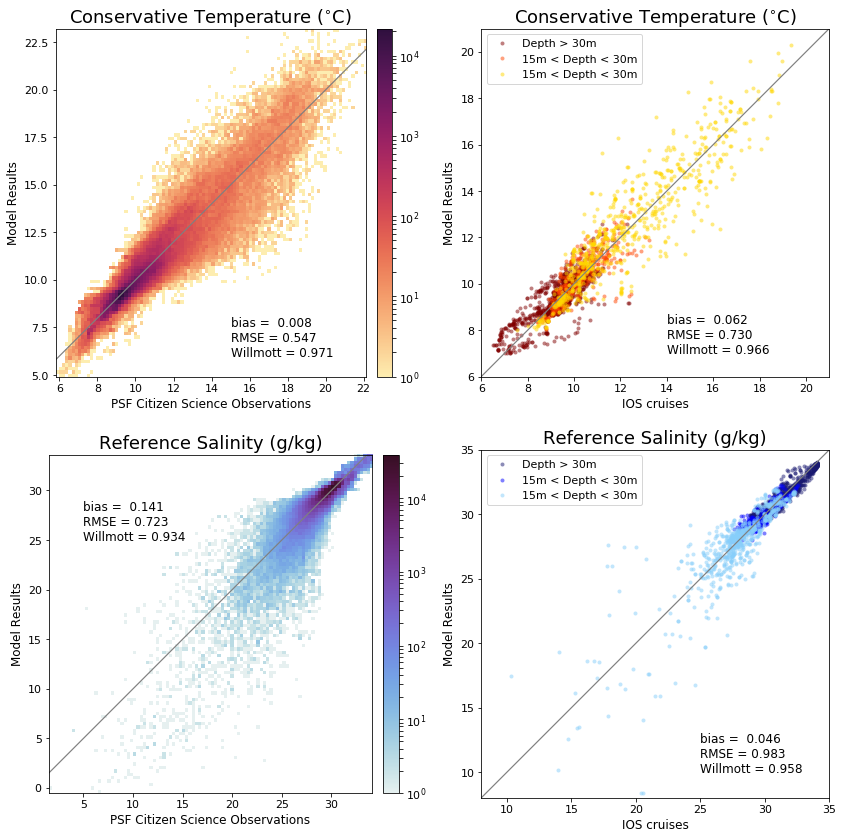

In [140]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
c, xedge, yedge, im0 = ax[0,0].hist2d(np.append(c2016b['cs_temps'].compressed(), cs_2017_t),
                                     np.append(c2016b['model_temps'].compressed(), model_2017_t_cs),
                                     bins = 100, norm=LogNorm(), cmap = cmocean.cm.matter);
ax[0,0].plot(np.arange(26), color = 'grey')
ax[0,0].set_title('Conservative Temperature ($^{\circ}$C)')
ax[0,0].set_xlabel('PSF Citizen Science Observations')
ax[0,0].set_ylabel('Model Results')
ax[0,0].set_aspect('equal')
ax[0,0].text(15, 6, 'bias =  0.008 \nRMSE = 0.547 \nWillmott = 0.971',
        fontsize = 12)
divider0 = make_axes_locatable(ax[0,0])
cax0 = divider0.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im0, cax = cax0)


c, xedge, yedge, im1 = ax[1,0].hist2d(np.append(c2016b['cs_sals'].compressed(), cs_2017_s),
                                     np.append(c2016b['model_sals'].compressed(), model_2017_s_cs),
                                     bins = 100, norm=LogNorm(), cmap = cmocean.cm.dense);
ax[1,0].plot(np.arange(40), color = 'grey')
ax[1,0].set_title('Reference Salinity (g/kg)')
ax[1,0].set_xlabel('PSF Citizen Science Observations')
ax[1,0].set_ylabel('Model Results')
ax[1,0].set_aspect('equal')
ax[1,0].text(5, 25, 'bias =  0.141 \nRMSE = 0.723 \nWillmott = 0.934',
        fontsize = 12)
divider1 = make_axes_locatable(ax[1,0])
cax1 = divider1.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im1, cax = cax1)

ax[0,1].plot(dfo_blue['dfo_t'][dfo_blue['depth'] > 21],
             dfo_blue['model_t'][dfo_blue['depth'] > 21], 
             '.', color = 'maroon', alpha = 0.5, label = 'Depth > 30m')
ax[0,1].plot(dfo_blue['dfo_t'][(dfo_blue['depth'] >= 15) & (dfo_blue['depth'] <= 21)],
             dfo_blue['model_t'][(dfo_blue['depth'] >= 15) & (dfo_blue['depth'] <= 21)], 
             '.', color = 'orangered', alpha = 0.5, label = '15m < Depth < 30m')
ax[0,1].plot(dfo_blue['dfo_t'][(dfo_blue['depth'] < 15)],
             dfo_blue['model_t'][(dfo_blue['depth'] < 15)], 
             '.', color = 'gold', alpha = 0.5, label = '15m < Depth < 30m')
ax[0,1].legend()
ax[0,1].plot(np.arange(26), color = 'grey')
ax[0,1].set_ylim(6, 21)
ax[0,1].set_xlim(6, 21)
ax[0,1].text(14, 7, 'bias =  0.062 \nRMSE = 0.730 \nWillmott = 0.966',
        fontsize = 12)
ax[0,1].set_title('Conservative Temperature ($^{\circ}$C)')
ax[0,1].set_xlabel('IOS cruises')
ax[0,1].set_ylabel('Model Results')
ax[0,1].set_aspect('equal')

ax[1,1].plot(dfo_blue['dfo_s'][dfo_blue['depth'] > 21],
             dfo_blue['model_s'][dfo_blue['depth'] > 21], 
             '.', color = 'midnightblue', alpha = 0.5, label = 'Depth > 30m')
ax[1,1].plot(dfo_blue['dfo_s'][(dfo_blue['depth'] >= 15) & (dfo_blue['depth'] <= 21)],
             dfo_blue['model_s'][(dfo_blue['depth'] >= 15) & (dfo_blue['depth'] <= 21)], 
             '.', color = 'blue', alpha = 0.5, label = '15m < Depth < 30m')
ax[1,1].plot(dfo_blue['dfo_s'][(dfo_blue['depth'] < 15)],
             dfo_blue['model_s'][(dfo_blue['depth'] < 15)], 
             '.', color = 'lightskyblue', alpha = 0.5, label = '15m < Depth < 30m')
ax[1,1].legend()
ax[1,1].plot(np.arange(40), color = 'grey')
ax[1,1].set_ylim(8, 35)
ax[1,1].set_xlim(8, 35)
ax[1,1].text(25, 10, 'bias =  0.046 \nRMSE = 0.983 \nWillmott = 0.958',
        fontsize = 12)
ax[1,1].set_title('Reference Salinity (g/kg)')
ax[1,1].set_xlabel('IOS cruises')
ax[1,1].set_ylabel('Model Results')
ax[1,1].set_aspect('equal')

fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/psf_plots.png', dpi = 400)

In [122]:
o = np.append(c2016b['cs_temps'].compressed(), cs_2017_t)
m = np.append(c2016b['model_temps'].compressed(), model_2017_t_cs)
print('bias =  ' + str(-np.mean(o) + np.mean(m)))
print('RMSE = ' + str(np.sqrt(np.sum((m - o)**2) /
                              len(o))))
xbar = np.mean(o)
print('Willmott = ' + str(1-(np.sum((m - o)**2)  / 
                             np.sum((np.abs(m - xbar) 
                                     + np.abs(o - xbar))**2))))

bias =  0.007755027337250198
RMSE = 0.5471593228637162
Willmott = 0.9711890035275378


In [125]:
o = np.append(c2016b['cs_sals'].compressed(), cs_2017_s)
m = np.append(c2016b['model_sals'].compressed(), model_2017_s_cs)
print('bias =  ' + str(-np.mean(o) + np.mean(m)))
print('RMSE = ' + str(np.sqrt(np.sum((m - o)**2) /
                              len(o))))
xbar = np.mean(o)
print('Willmott = ' + str(1-(np.sum((m - o)**2)  / 
                             np.sum((np.abs(m - xbar) 
                                     + np.abs(o - xbar))**2))))

bias =  0.14123996754318213
RMSE = 0.7216391340774553
Willmott = 0.933523068047556


In [141]:
o = dfo_blue['dfo_s']
m = dfo_blue['model_s']
print('bias =  ' + str(-np.mean(o) + np.mean(m)))
print('RMSE = ' + str(np.sqrt(np.sum((m - o)**2) /
                              len(o))))
xbar = np.mean(o)
print('Willmott = ' + str(1-(np.sum((m - o)**2)  / 
                             np.sum((np.abs(m - xbar) 
                                     + np.abs(o - xbar))**2))))

bias =  0.04556223678413218
RMSE = 0.9827939016865325
Willmott = 0.957590867390219


In [142]:
o = dfo_blue['dfo_t']
m = dfo_blue['model_t']
print('bias =  ' + str(-np.mean(o) + np.mean(m)))
print('RMSE = ' + str(np.sqrt(np.sum((m - o)**2) /
                              len(o))))
xbar = np.mean(o)
print('Willmott = ' + str(1-(np.sum((m - o)**2)  / 
                             np.sum((np.abs(m - xbar) 
                                     + np.abs(o - xbar))**2))))

bias =  0.061719336018905224
RMSE = 0.7299817071030354
Willmott = 0.9656717978275993
